In [1]:
#Importing the necessary libraries
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualizing the data

In [2]:
df = pd.read_csv("IVE_tickbidask.txt", header = None)#reading the file containg the data
df.columns = ['Date', 'Time', 'Price','Bid','Ask','Volume'] 
df['Date'] = df['Date'].str.cat(df['Time'], sep = ' ')
#Droppong columns that are not relevant for this project
df = df.drop(columns=['Time', 'Bid','Ask','Volume'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
df.set_index('Date', inplace=True)
df

,Price
Date,
2009-09-28 09:30:00,50.79
2009-09-28 09:30:00,50.71
2009-09-28 09:31:32,50.75
2009-09-28 09:31:32,50.75
2009-09-28 09:31:33,50.75
...,...
2023-11-06 15:59:58,156.99
2023-11-06 15:59:58,156.99
2023-11-06 15:59:58,156.99


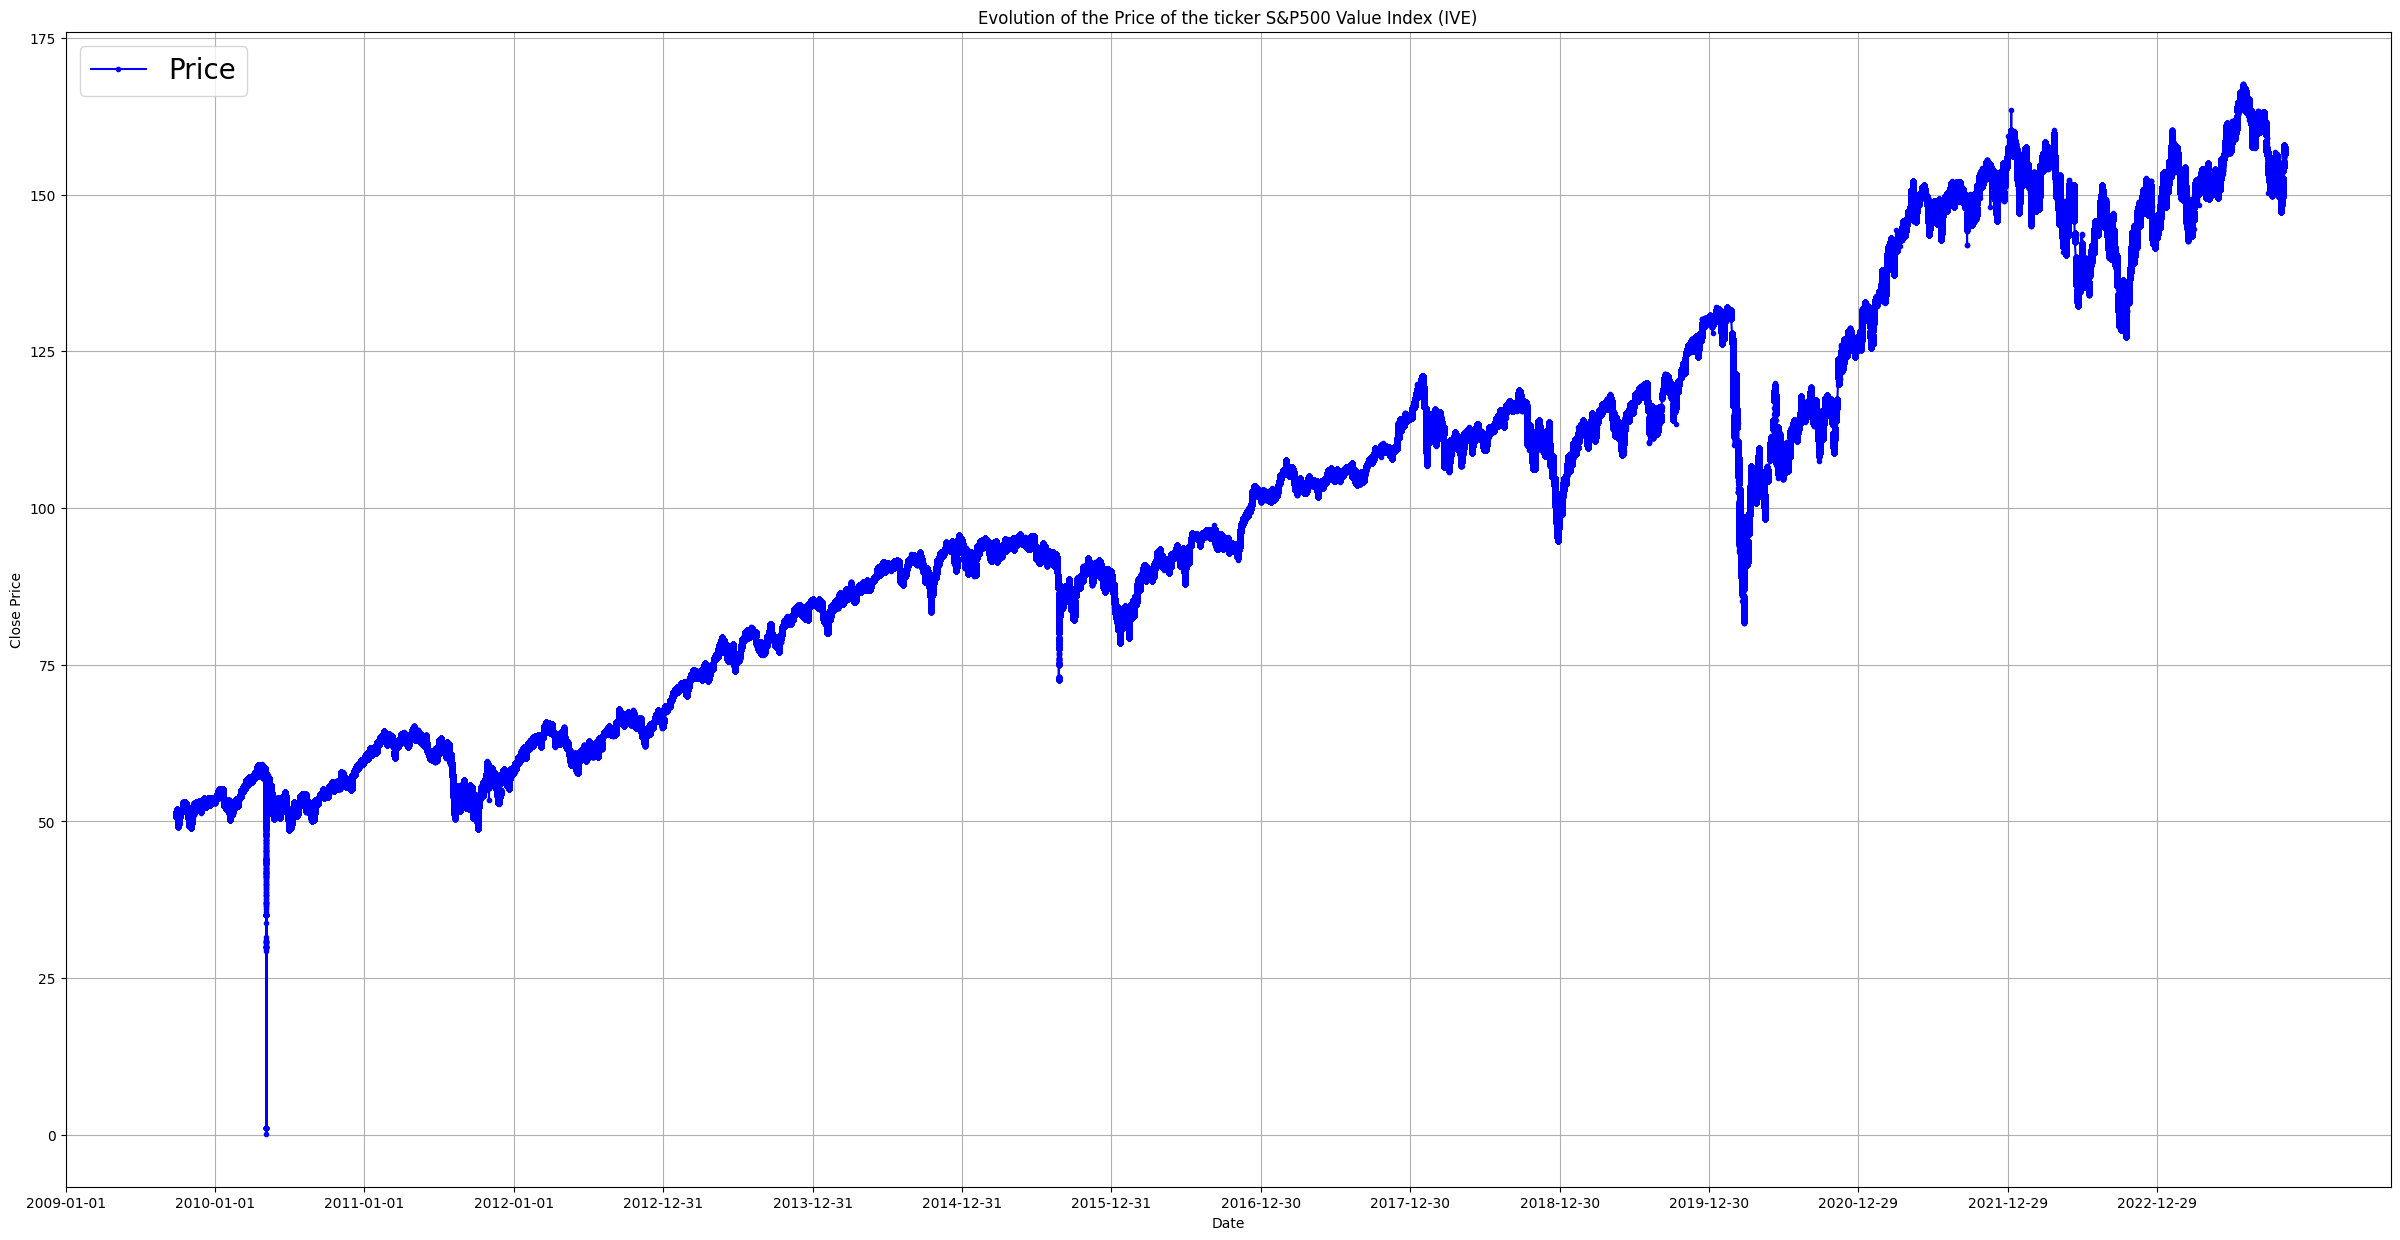

In [3]:
# Plot the price based on the date
plt.figure(figsize=(30, 15))  #Size figure
plt.plot(df.index, df['Price'], marker='.', linestyle='-', color='b', label = 'Price')
plt.title('Evolution of the Price of the ticker S&P500 Value Index (IVE)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
date_list = [datetime(2009, 1, 1) + timedelta(days=365 * i) for i in range((datetime(2023,1, 1) - datetime(2009, 1, 1)).days // 365 + 1)]
date_list_f = [date.strftime("%Y-%m-%d") for date in date_list]
plt.xticks(date_list)
plt.legend(fontsize=20)
plt.savefig('Image_1.png')
plt.show()

### Outliers 

We notice some exaggeration in the price data for a specific date within the year 2010.

The dates and prices for this time range are:

In [4]:
df[df['Price'] <= 28]

,Price
Date,
2010-05-06 14:49:07,0.11
2010-05-06 14:53:30,1.10
2010-05-06 14:53:32,1.10
2010-05-06 14:55:32,1.10
2010-05-06 14:55:32,1.10
2010-05-06 14:55:32,1.10
2010-05-06 14:55:32,1.10
2010-05-06 14:55:32,1.10
2010-05-06 14:55:32,1.10


We notice that this exaggeration is only present for the date 2010-05-06 at 2:00 PM, where prices move from more the $20 to $1.10.

To be sure about this we take into consideration another source of financial data: Yahoo Finance. 

In [5]:
import yfinance as yf

ticker_symbol = "IVE"  # S&P 500 Value Index ticker symbol
sp500_value_index = yf.Ticker(ticker_symbol)
# retrieve historical data
data_yfinance = sp500_value_index.history(period="20Y")  # "1d" for today's data

data_yfinance.index = data_yfinance.index.strftime('%Y-%m-%d')
data_yfinance.index = pd.to_datetime(data_yfinance.index, format='%Y-%m-%d')

#Selection of dates between 2009-09-28 and 2023-11-06
data_yfinance = data_yfinance[(data_yfinance.index >= datetime(2009, 9, 28)) & (data_yfinance.index <= datetime(2023, 11, 6))]
data_yfinance = data_yfinance.drop(columns=['Dividends', 'Stock Splits','Capital Gains'])

data_yfinance

,Open,High,Low,Close,Volume
Date,,,,,
2009-09-28,36.850915,37.438612,36.792869,37.395081,819300
2009-09-29,37.525684,37.699815,37.271738,37.358807,492300
2009-09-30,37.503913,37.503913,36.843659,37.141136,468300
2009-10-01,37.068579,37.068579,36.118101,36.125359,986300
2009-10-02,35.726298,36.139864,35.690018,35.922195,921900
...,...,...,...,...,...
2023-10-31,150.009995,151.130005,149.610001,151.039993,417900
2023-11-01,151.250000,152.660004,151.020004,152.350006,646800
2023-11-02,153.720001,155.300003,153.649994,155.199997,1263600


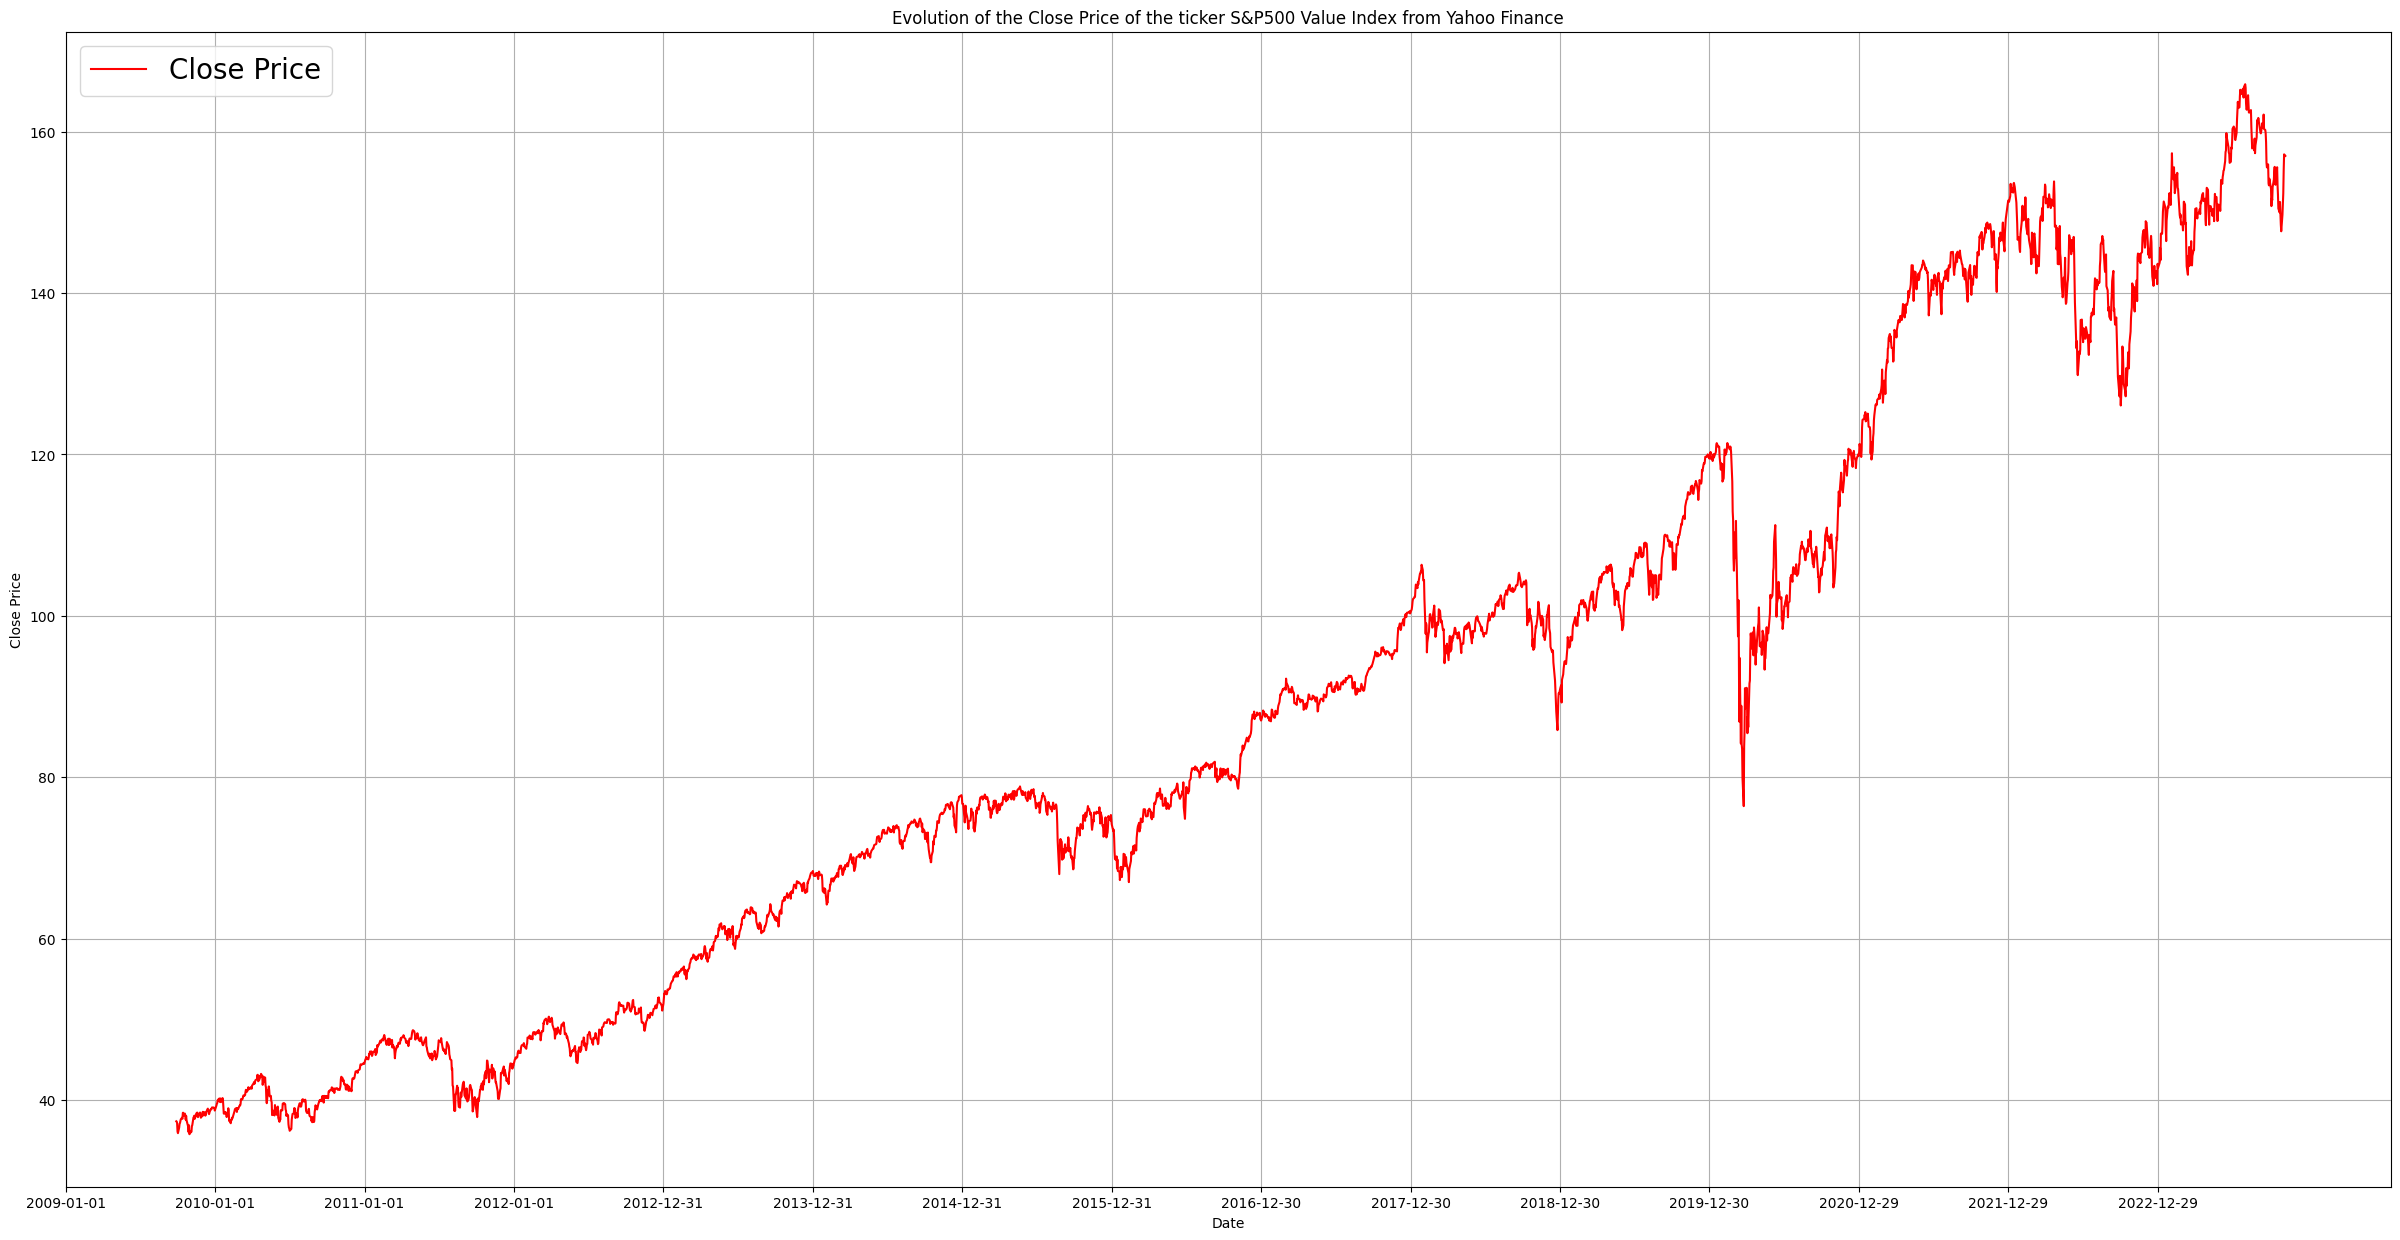

In [6]:
# Plot the price based on the date
plt.figure(figsize=(30, 15))  #Size figure
plt.plot(data_yfinance.index, data_yfinance['Close'], marker='', linestyle='-', color='r', label = 'Close Price')
plt.title('Evolution of the Close Price of the ticker S&P500 Value Index from Yahoo Finance')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
date_list = [datetime(2009, 1, 1) + timedelta(days=365 * i) for i in range((datetime(2023,1, 1) - datetime(2009, 1, 1)).days // 365 + 1)]
date_list_f = [date.strftime("%Y-%m-%d") for date in date_list]
plt.xticks(date_list_f)
plt.legend(fontsize = 20)
plt.savefig('Image_yfinance_IVE.png')
plt.show()

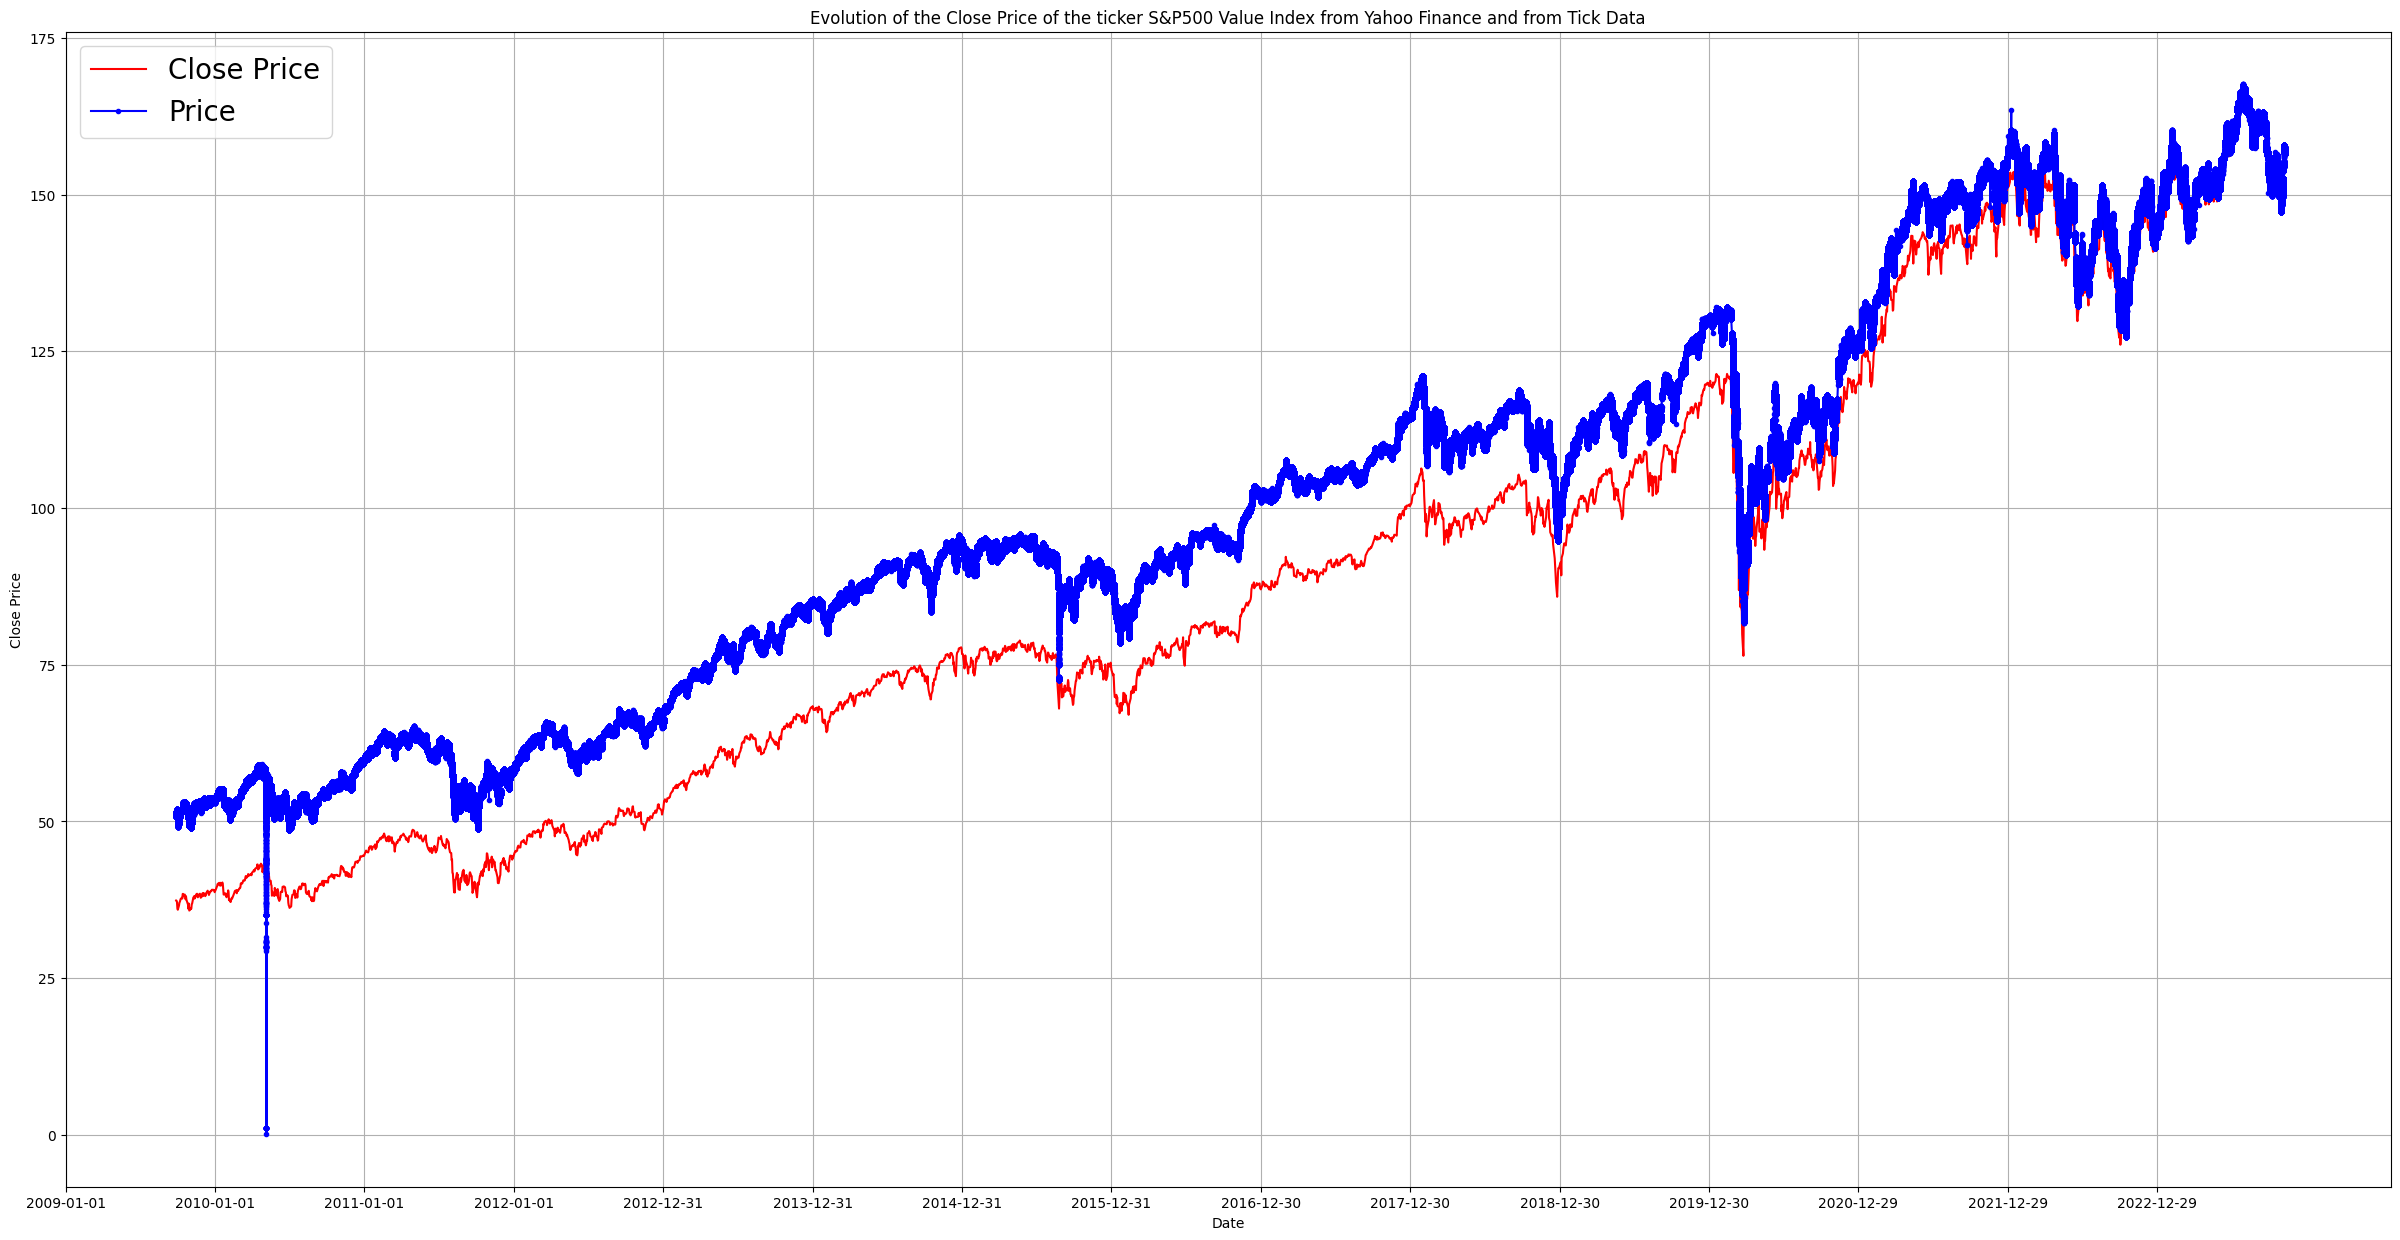

In [7]:
# Plotting on the same figure the prices from the two data sources
plt.figure(figsize=(30, 15))  
plt.plot(data_yfinance.index, data_yfinance['Close'], marker='', linestyle='-', color='r', label = 'Close Price')
plt.plot(df.index, df['Price'], marker='.', linestyle='-', color='b', label = 'Price')
plt.title('Evolution of the Close Price of the ticker S&P500 Value Index from Yahoo Finance and from Tick Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
date_list = [datetime(2009, 1, 1) + timedelta(days=365 * i) for i in range((datetime(2023,1, 1) - datetime(2009, 1, 1)).days // 365 + 1)]
date_list_f = [date.strftime("%Y-%m-%d") for date in date_list]
plt.xticks(date_list_f)
plt.legend(fontsize=20)
plt.savefig('comparison_yfinance_data.png')
plt.show()

We take a look into the data from Yahoo finance for the specific date of the outlier:

In [8]:
data_yfinance[data_yfinance.index == '2010-05-06']

,Open,High,Low,Close,Volume
Date,,,,,
2010-05-06,41.426605,41.602702,21.498397,40.12056,1516900


We observe that for this same date, the data from Yahoo Finance indicates a low price of $21.50. Therefore, we choose to remove values for this date that exceed this amount

In [9]:
index_to_drop = df[df['Price'] <= 28].index.to_list()
df.drop(index_to_drop, inplace=True)

We look for the price chart again once the outliers were deleted:

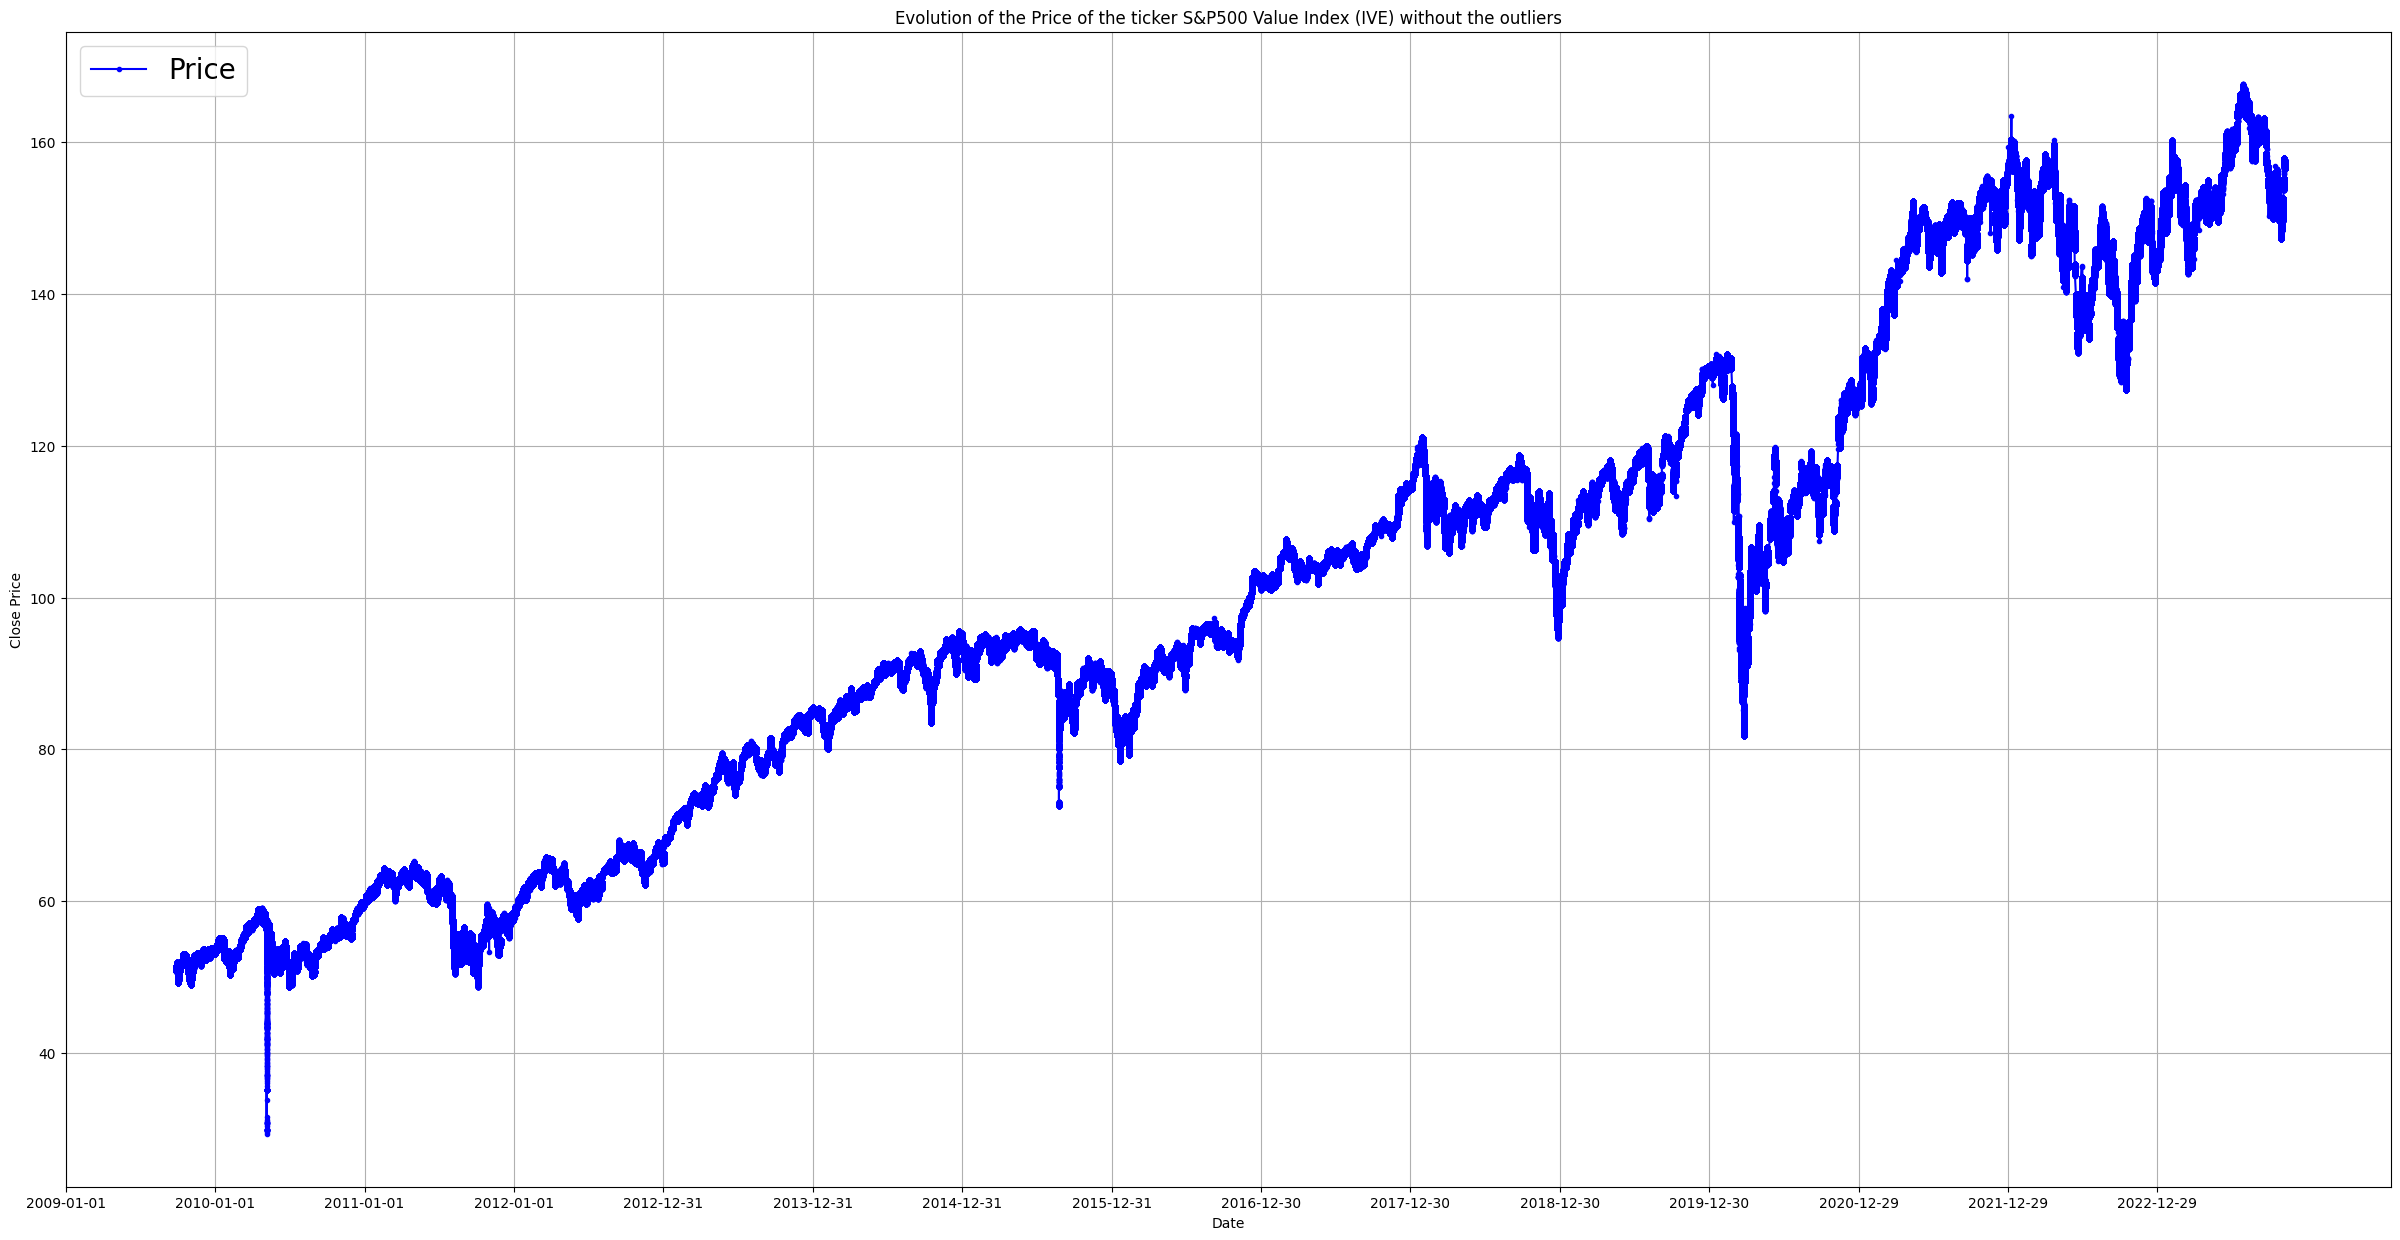

In [10]:
plt.figure(figsize=(30, 15))  
plt.plot(df.index, df['Price'], marker='.', linestyle='-', color='b', label = 'Price')
plt.title('Evolution of the Price of the ticker S&P500 Value Index (IVE) without the outliers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
date_list = [datetime(2009, 1, 1) + timedelta(days=365 * i) for i in range((datetime(2023,1, 1) - datetime(2009, 1, 1)).days // 365 + 1)]
date_list_f = [date.strftime("%Y-%m-%d") for date in date_list]
plt.xticks(date_list)
plt.legend(fontsize=20)
plt.savefig('Image_1_without_outliers.png')
plt.show()

### Focusing on the last year 

In [11]:
df_last_y = df[df.index >= datetime(2022,1,1)]
data_yfinance_last_y = data_yfinance[data_yfinance.index >= datetime(2022,1,1)]

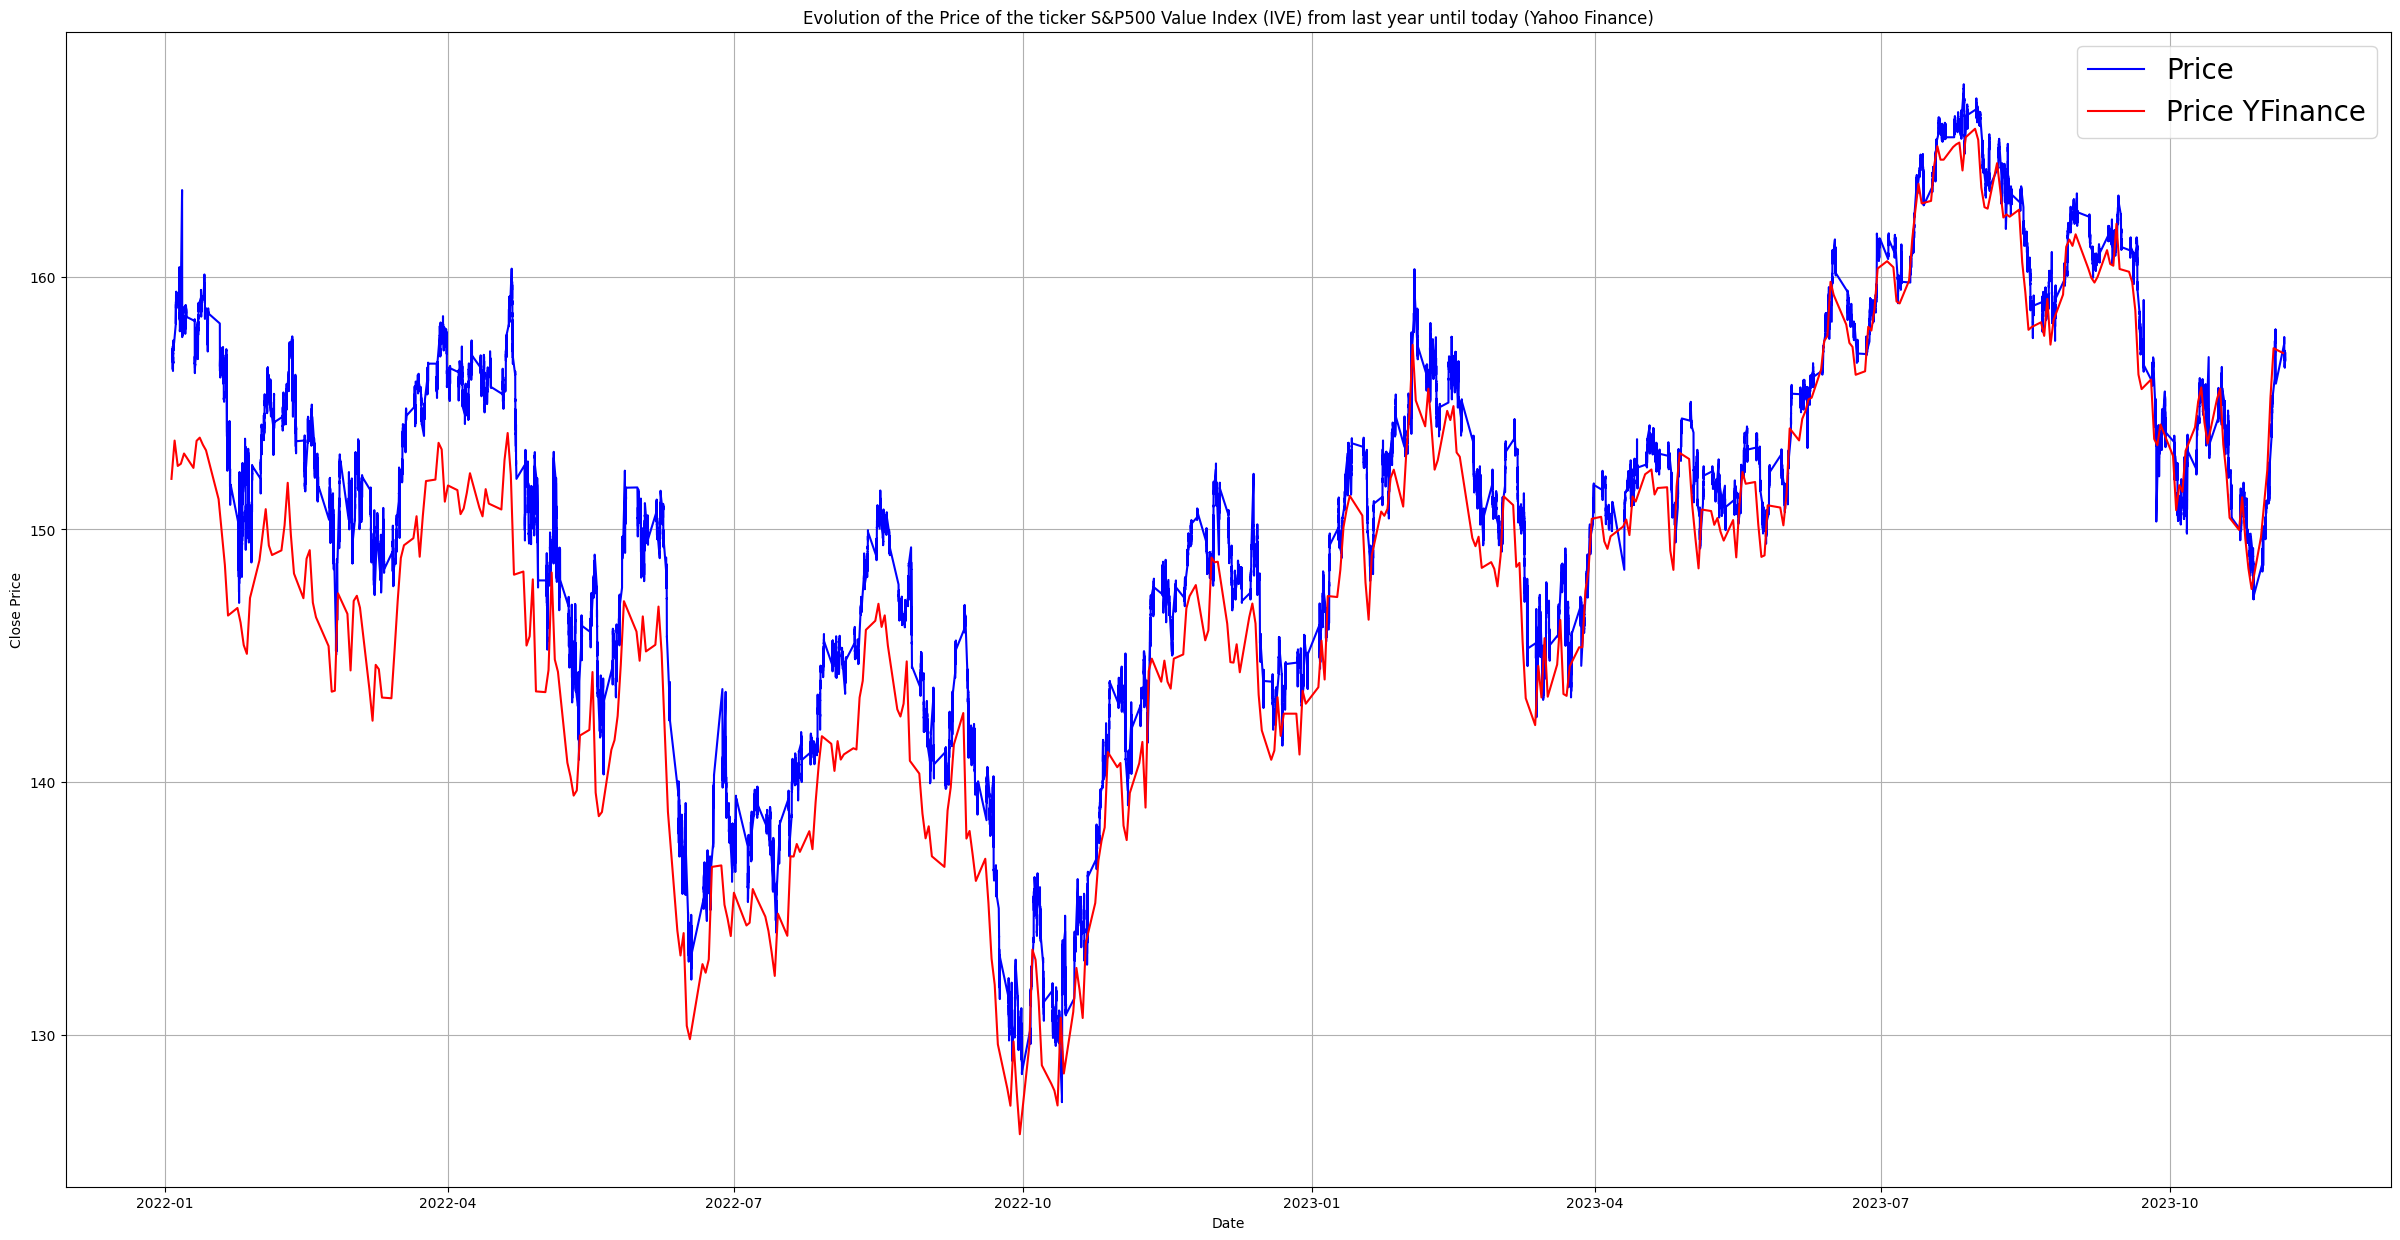

In [12]:
plt.figure(figsize=(30, 15))  
plt.plot(df_last_y.index, df_last_y['Price'], linestyle='-', color='b', label = 'Price')
plt.plot(data_yfinance_last_y.index, data_yfinance_last_y['Close'], linestyle='-', color='r', label = 'Price YFinance')
plt.title('Evolution of the Price of the ticker S&P500 Value Index (IVE) from last year until today (Yahoo Finance)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
#date_list = [datetime(2009, 1, 1) + timedelta(days=365 * i) for i in range((datetime(2023,1, 1) - datetime(2009, 1, 1)).days // 365 + 1)]
#date_list_f = [date.strftime("%Y-%m-%d") for date in date_list]
#plt.xticks(date_list)
plt.legend(fontsize=20)
plt.savefig('compare_yfinance_last_year_to_today.png')
plt.show()

# Realized Volatility 

### Returns for different observations frequency 

- Réaliser une fonction qui permet de renvoyer les retours selon les différentes fréquence
- Réaliser différentes fonction qui calculent la volatilité, selon différentes manières de calculs de la volatilité
- Déterminer la long-range volatility estimation 
- Déterminer la microstructure noise selon différentes façon 
- La cacluler pour différentes intervalles et trouver un pattern 
- Ploter la daily volatility pour l'année passée 

In [13]:
#different interval of frequencies taken into consideration 
observation_frequencies = [
    "30 seconds",
    "1 minutes",
    "3 minutes",
    "5 minutes",
    "10 minutes",
    "15 minutes", 
    "1 hours",
    "1 days"
    ]

#function returning the dataframe df with a new column returns depending on the frequency 
def returns(frequency, df):
    dates = [df.index[0]]
    frequency = "30 seconds"
    for date in df.index:
        if date - dates[-1] >= pd.Timedelta(frequency):
            dates.append(date)

    partial_df = df[df.index.isin(dates)]

    partial_df['Returns'] = partial_df['Price'].pct_change()
    partial_df
    
    return partial_df

/var/folders/zw/dpjp09bn4_l8yjw9zyyrfcmr0000gn/T/ipykernel_1476/3462990353.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df['Returns'] = partial_df['Price'].pct_change()


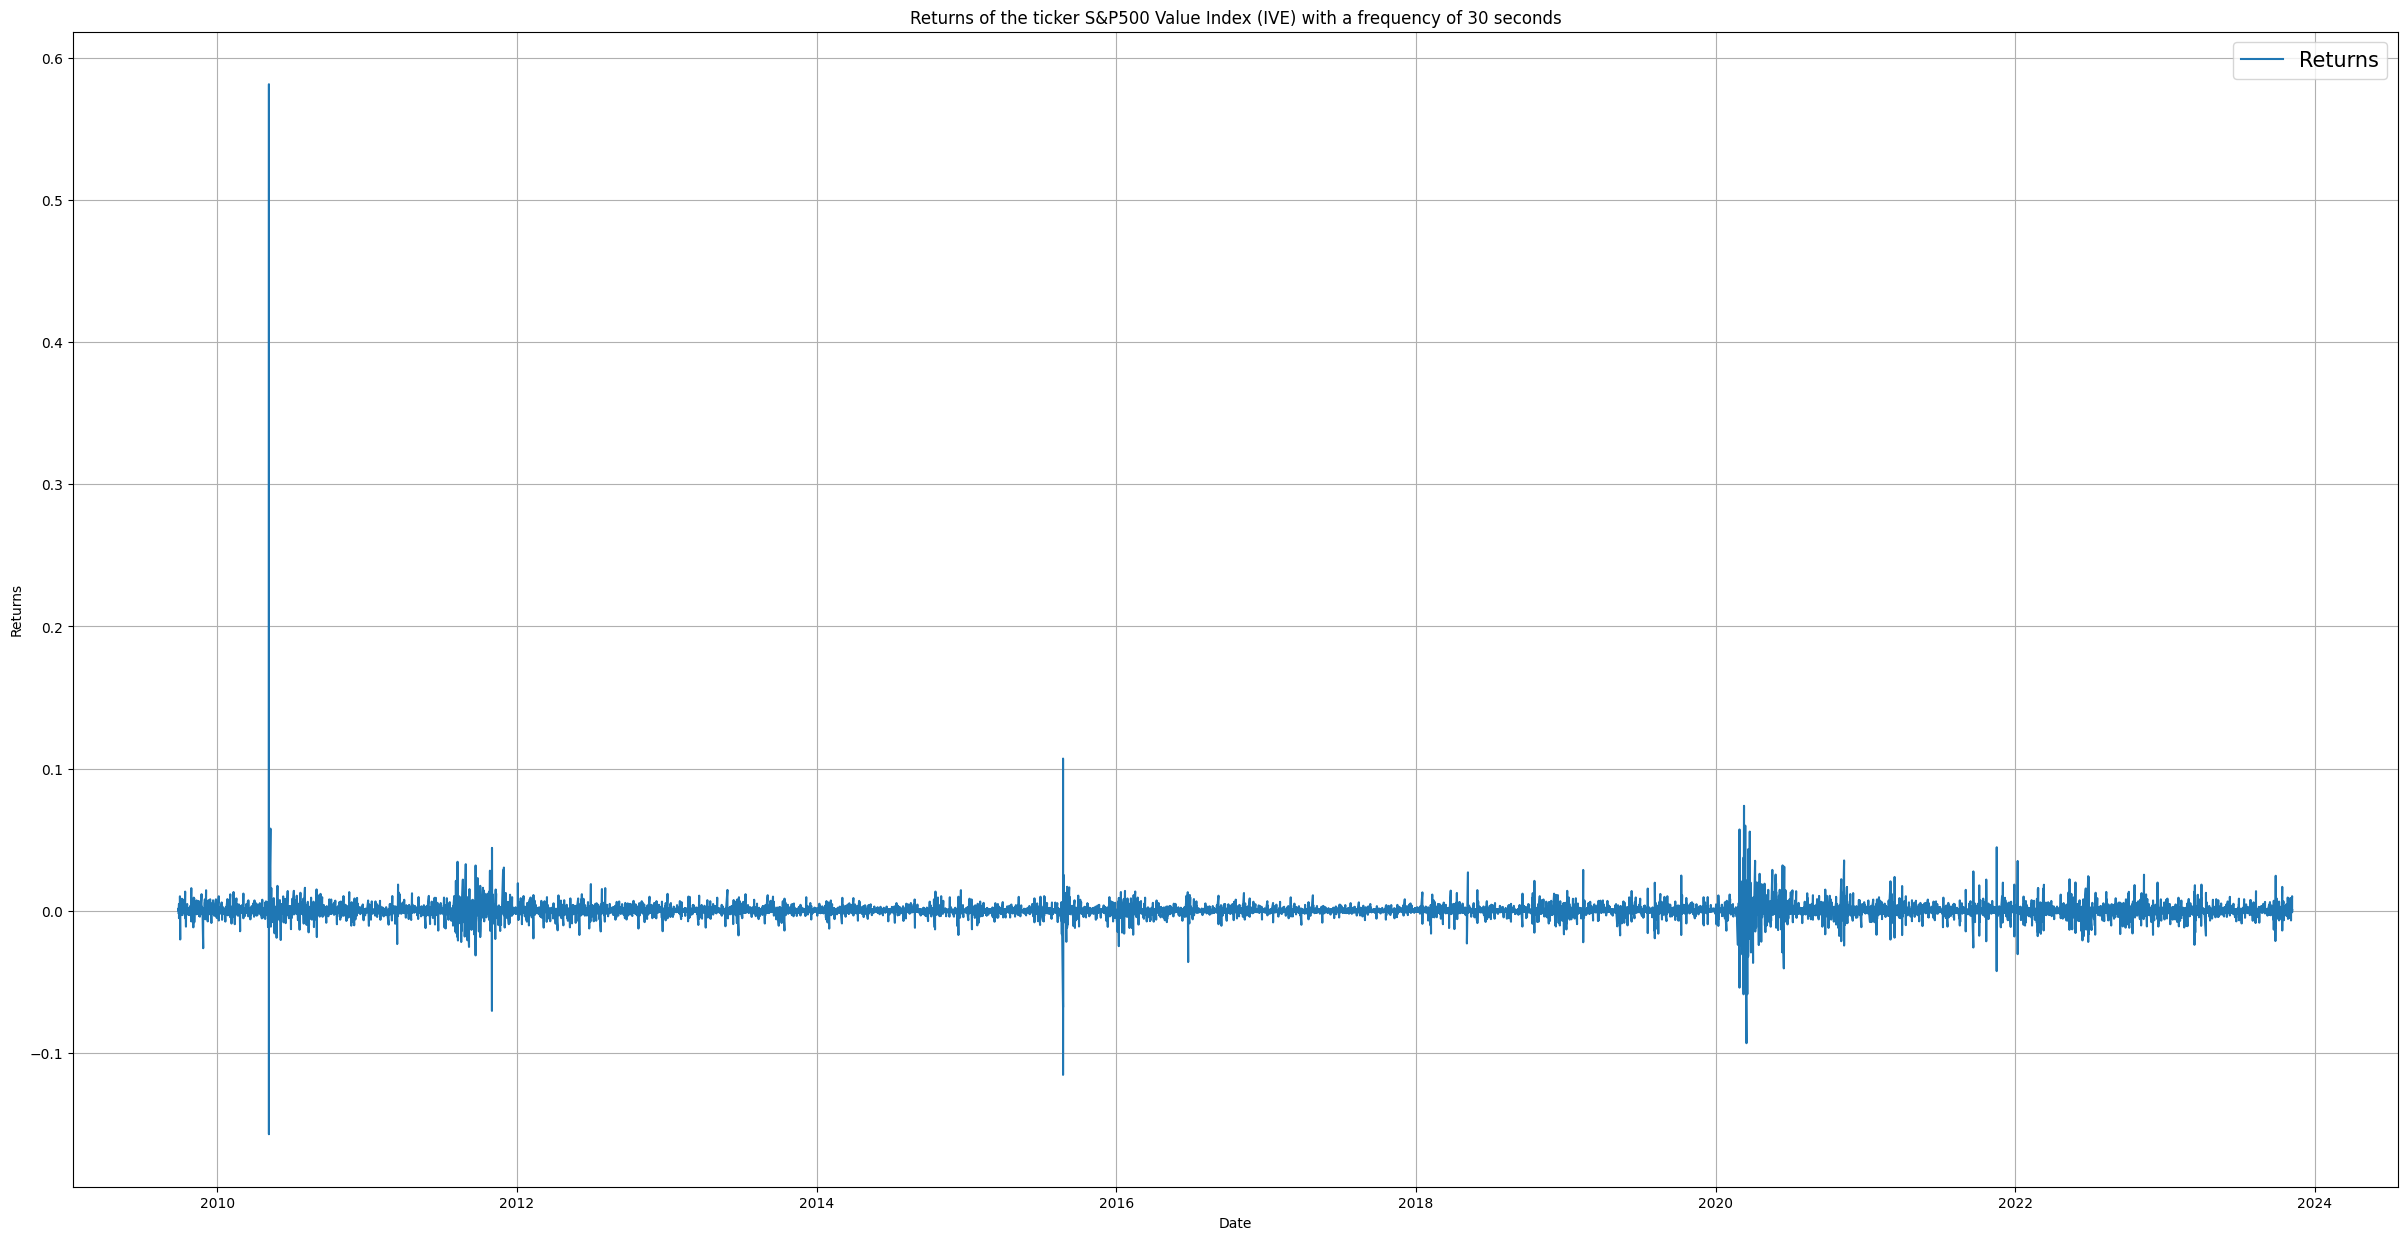

In [14]:
frequency = observation_frequencies[0]
partial_df = returns(frequency, df)
plt.figure(figsize=(30, 15))
plt.plot(partial_df.index, partial_df['Returns'], label="Returns")
plt.title('Returns of the ticker S&P500 Value Index (IVE) with a frequency of 30 seconds')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.legend(fontsize=15)
plt.show()

### Volatility based on different time range

In [15]:
time_range = {}
time_range['1 days'] = pd.Timedelta(days=1)
time_range['1 weeks'] = pd.Timedelta(weeks=1)
time_range['1 months'] = pd.Timedelta(days=30)
time_range['3 months'] = pd.Timedelta(days=90)
time_range['6 months'] = pd.Timedelta(days=180)
time_range['1 years'] = pd.Timedelta(days=365)

In [16]:
#function returning a list of dates between the start and end date with a given frequency
def date_range(start_date, end_date, time_r):
    dates = [start_date]
    date = start_date
    delta = time_range[time_r]
    while date < end_date:
        date += delta
        dates.append(date)
    return dates 

In [22]:
#function returning a list of the volatility of the returns of the ticker S&P500 Value Index (IVE) with a given time range
#dataframe df containing already the returns for a specific frequency
def volatility(time_r, df_with_returns):
    start_date = df_with_returns.index[0]
    end_date = df_with_returns.index[-1]
    date_list = date_range(start_date, end_date, time_r)
    
    volatility = []
    for i in range(len(date_list)-1):
        partial_df = df_with_returns[(df_with_returns.index >= date_list[i]) & (df_with_returns.index < date_list[i+1])]
        volatility.append(partial_df['Returns'].std())
    return (volatility, date_list)

In [23]:
(daily_volatility, date_list) = volatility('1 days', partial_df)

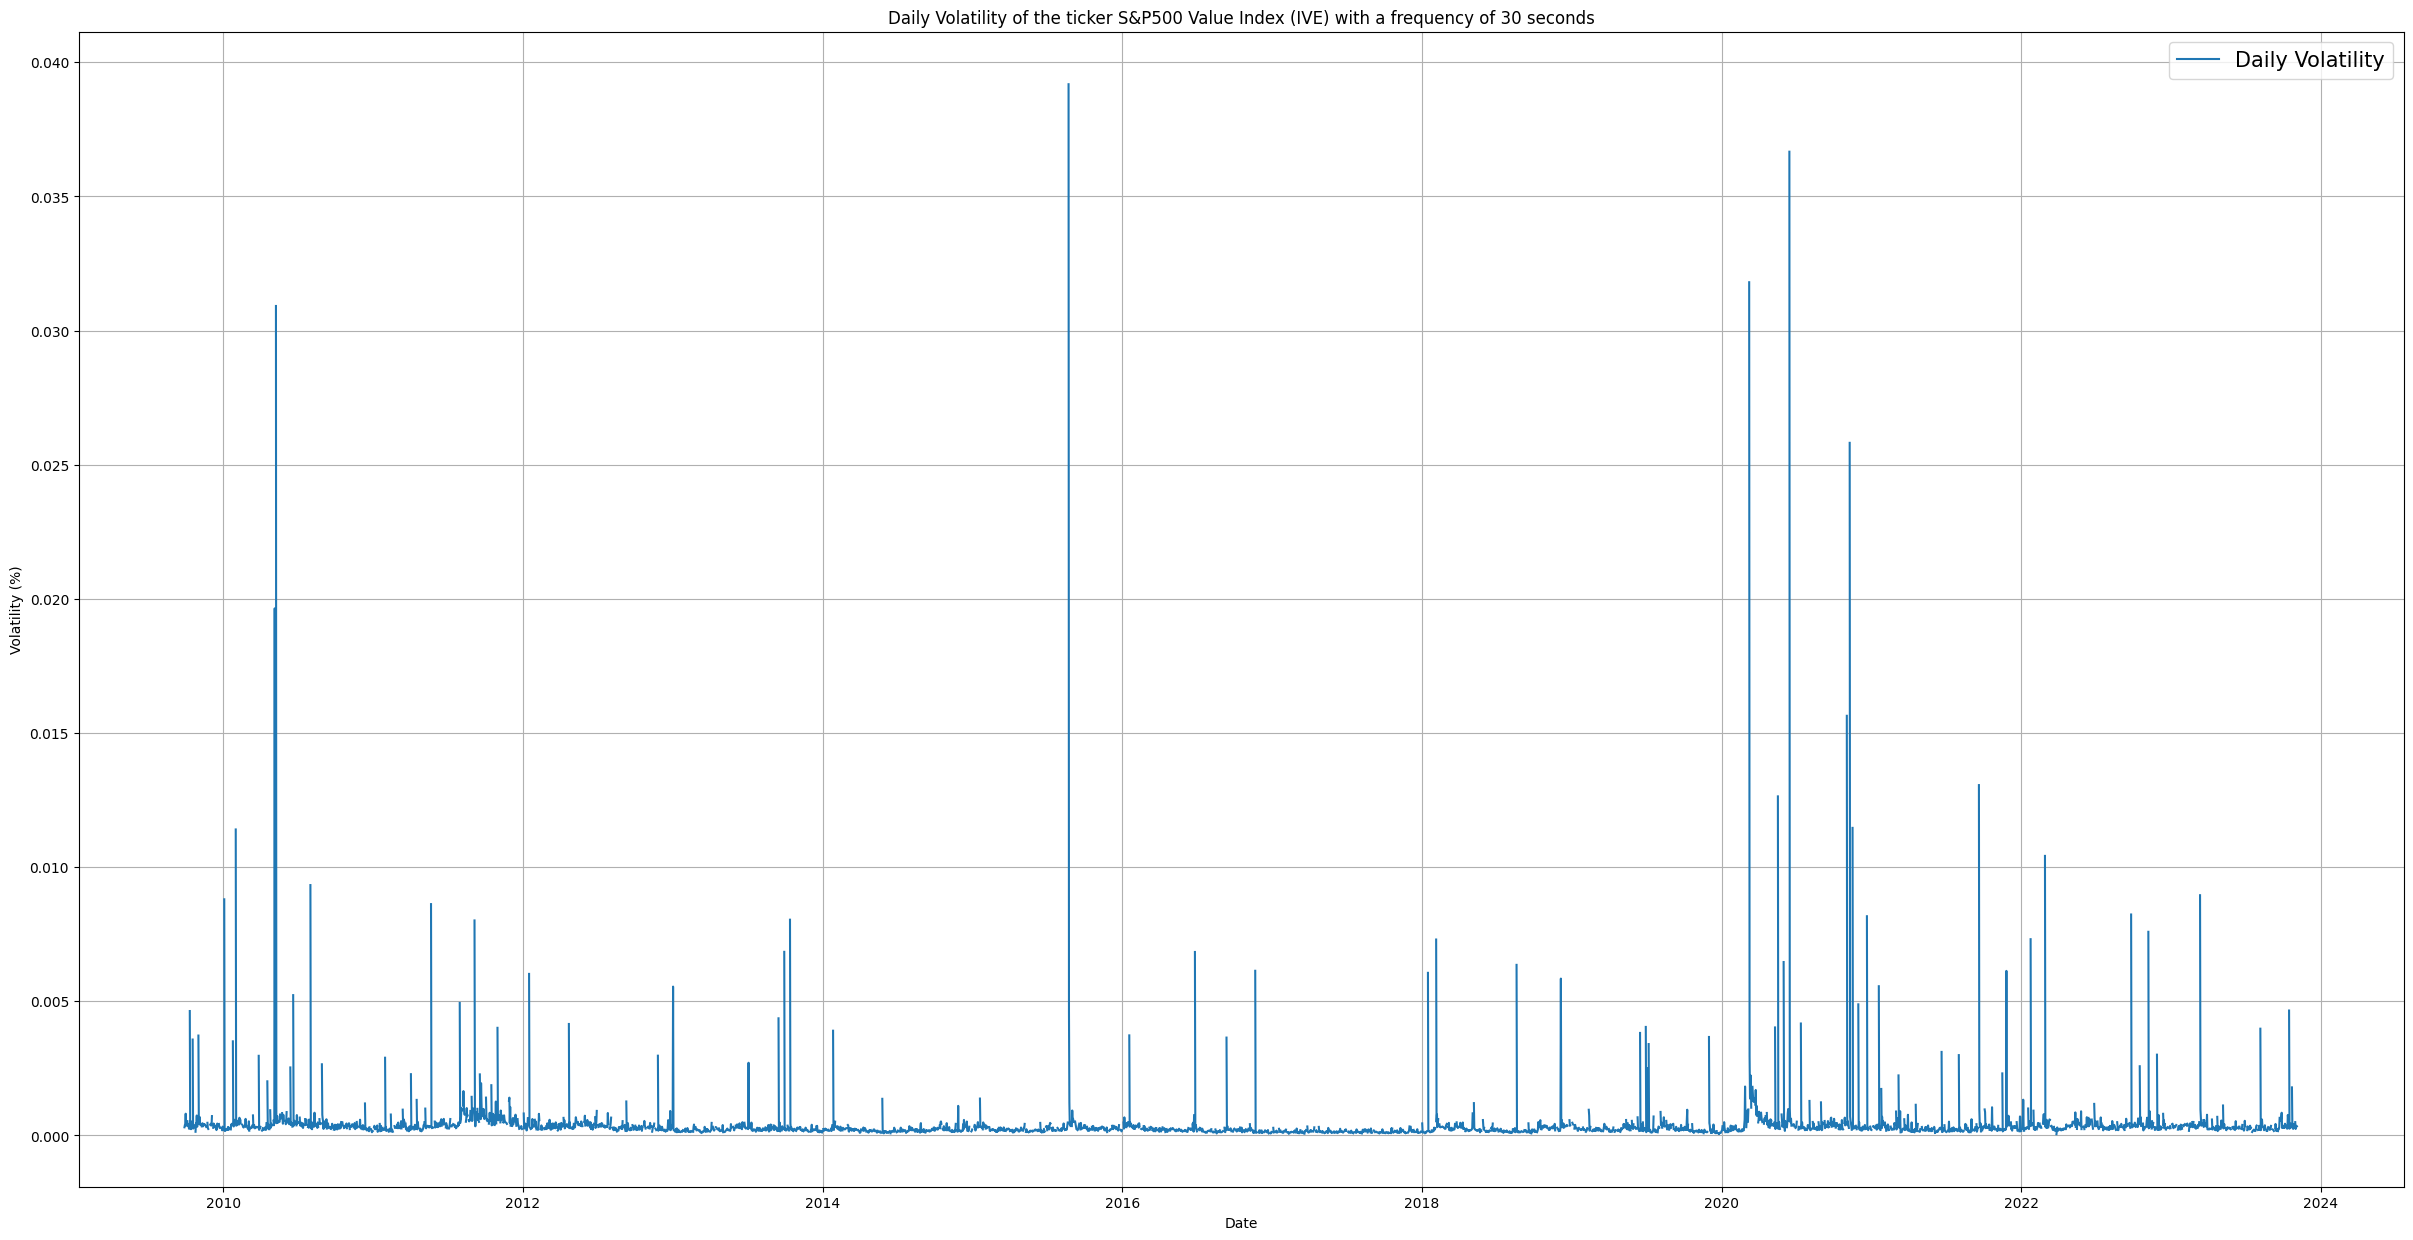

In [24]:
plt.figure(figsize=(30, 15))
plt.plot(date_list[:-1], daily_volatility, label="Daily Volatility")
plt.title('Daily Volatility of the ticker S&P500 Value Index (IVE) with a frequency of 30 seconds')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.legend(fontsize=15)
plt.show()

### Long-range volatility estimation 

In [25]:
#function that returns the long-range volatility of the ticker S&P500 Value Index (IVE) with a given time range based on daily returns 
def long_range_volatility(long_range_time, df): 
    #daily returns
    df_with_returns = returns("1 days", df)
    #calculating the volatility
    return volatility(long_range_time, df_with_returns) 

In [ ]:
(daily_volatility, date_list) = long_range_volatility("1 months", df)

# Market Noise Microstructure